# Simulación Flujo de Stokes

Se intentará resolver la ecuación homogénea con condición de frontera de Dirichlet, considerando $\mu=1$.

Primero, partimos importando las librerías que utilizaremos. Notar que ```bempp``` corresponde a una modificación de la librería original que incluya las nuevas implementaciones para el flujo de Stokes.

In [2]:
import bempp.api
import numpy as np

Se sitúa una esfera en el origen con radio 1:

In [3]:
grid = bempp.api.shapes.sphere(h=0.1)

A continuación, se define el espacio a utilizar. En nuestro caso, utilizaremos funciones P1 debido a que nuestra incógnita corresponde a la función de Neumann y que el costo computacional no es significativo para el caso que estamos estudiando.

In [4]:
p1_space = bempp.api.function_space(grid, "P", 1)

Ahora, definimos a los operadores. En nuestro caso, solo necesitamos al single layer y este se encuentra programado por coordenadas, por lo que armamos un bloque de capas:

In [5]:
slp1 = bempp.api.operators.boundary.stokes.single_layer(
    p1_space, p1_space, p1_space, opt_layer=0
)
slp2 = bempp.api.operators.boundary.stokes.single_layer(
    p1_space, p1_space, p1_space, opt_layer=1
)
slp3 = bempp.api.operators.boundary.stokes.single_layer(
    p1_space, p1_space, p1_space, opt_layer=2
)
slp4 = bempp.api.operators.boundary.stokes.single_layer(
    p1_space, p1_space, p1_space, opt_layer=3
)
slp5 = bempp.api.operators.boundary.stokes.single_layer(
    p1_space, p1_space, p1_space, opt_layer=4
)
slp6 = bempp.api.operators.boundary.stokes.single_layer(
    p1_space, p1_space, p1_space, opt_layer=5
)
slp7 = bempp.api.operators.boundary.stokes.single_layer(
    p1_space, p1_space, p1_space, opt_layer=6
)
slp8 = bempp.api.operators.boundary.stokes.single_layer(
    p1_space, p1_space, p1_space, opt_layer=7
)
slp9 = bempp.api.operators.boundary.stokes.single_layer(
    p1_space, p1_space, p1_space, opt_layer=8
)

A = bempp.api.GeneralizedBlockedOperator(
    [[slp1, slp2, slp3], [slp4, slp5, slp6], [slp7, slp8, slp9]]
)

Definimos la función de grilla en la esfera, representando a la parte de Dirichlet:

In [6]:
@bempp.api.real_callable
def dirichlet_data(x, n, domain_index, result):
    result[0] = 0


dirichlet_fun = bempp.api.GridFunction(p1_space, fun=dirichlet_data)

Construimos el lado derecho de la ecuación integral de borde (problema interior)

$$(\tfrac12\mathsf{Id}+\mathsf{K})u.$$

In [7]:
rhs = [dirichlet_fun, dirichlet_fun, dirichlet_fun]

Resolvemos el sistema lineal mediante una descomposición LU directa:

In [8]:
Tu = bempp.api.linalg.lu(A, rhs)

Definimos puntos en los que evaluaremos la solución:

In [9]:
n_grid_points = 150
plot_grid = np.mgrid[-3 : 3 : n_grid_points * 1j, -3 : 3 : n_grid_points * 1j]
points = np.vstack(
    (plot_grid[0].ravel(), plot_grid[1].ravel(), np.zeros(plot_grid[0].size))
)

Utilizamos las formulas de representación para evaluar la velocidad y la presión en los puntos recién definidos:

In [10]:
# Velocidad:
slp1_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=0
)
slp2_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=1
)
slp3_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=2
)
slp4_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=3
)
slp5_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=4
)
slp6_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=5
)
slp7_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=6
)
slp8_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=7
)
slp9_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=8
)

u_evaluated1 = slp1_pot * Tu[0] + slp2_pot * Tu[1] + slp3_pot * Tu[2]
u_evaluated2 = slp4_pot * Tu[0] + slp5_pot * Tu[1] + slp6_pot * Tu[2]
u_evaluated3 = slp7_pot * Tu[0] + slp8_pot * Tu[1] + slp9_pot * Tu[2]

In [11]:
print(u_evaluated1)
print(u_evaluated2)
print(u_evaluated3)

[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]


In [12]:
# Presión:
slp10_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=9
)
slp11_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=10
)
slp12_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=11
)

p_evaluated = slp10_pot * Tu[0] + slp11_pot * Tu[1] + slp12_pot * Tu[2]

In [13]:
print(p_evaluated)

[[0. 0. 0. ... 0. 0. 0.]]


# Otras simulaciones

Cambiemos el lado derecho del sistema para obtener otros resultados y consideremos un problema exterior:

#### Caso 1: $rhs=(10,0,0)$

In [36]:
@bempp.api.real_callable
def dirichlet_data_x(x, n, domain_index, result):
    result[0] = 10


@bempp.api.real_callable
def dirichlet_data_y(x, n, domain_index, result):
    result[0] = 0


@bempp.api.real_callable
def dirichlet_data_z(x, n, domain_index, result):
    result[0] = 0


dirichlet_fun_x = bempp.api.GridFunction(p1_space, fun=dirichlet_data_x)
dirichlet_fun_y = bempp.api.GridFunction(p1_space, fun=dirichlet_data_y)
dirichlet_fun_z = bempp.api.GridFunction(p1_space, fun=dirichlet_data_z)
rhs = [dirichlet_fun_x, dirichlet_fun_y, dirichlet_fun_z]

# Resolvemos el sistema:
Tu = bempp.api.linalg.lu(A, rhs)

Buscamos plotear la solución en $z=0$:

In [37]:
n_grid_points = 200
plot_grid = np.mgrid[-3 : 3 : n_grid_points * 1j, -3 : 3 : n_grid_points * 1j]
points = np.vstack(
    (plot_grid[0].ravel(), plot_grid[1].ravel(), np.zeros(plot_grid[0].size))
)

In [38]:
# Velocidad:
slp1_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=0
)
slp2_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=1
)
slp3_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=2
)
slp4_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=3
)
slp5_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=4
)
slp6_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=5
)
slp7_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=6
)
slp8_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=7
)
slp9_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=8
)

u_evaluated1 = slp1_pot * Tu[0] + slp2_pot * Tu[1] + slp3_pot * Tu[2]
u_evaluated2 = slp4_pot * Tu[0] + slp5_pot * Tu[1] + slp6_pot * Tu[2]
u_evaluated3 = slp7_pot * Tu[0] + slp8_pot * Tu[1] + slp9_pot * Tu[2]

In [39]:
# Presión:
slp10_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=9
)
slp11_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=10
)
slp12_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=11
)

p_evaluated = slp10_pot * Tu[0] + slp11_pot * Tu[1] + slp12_pot * Tu[2]

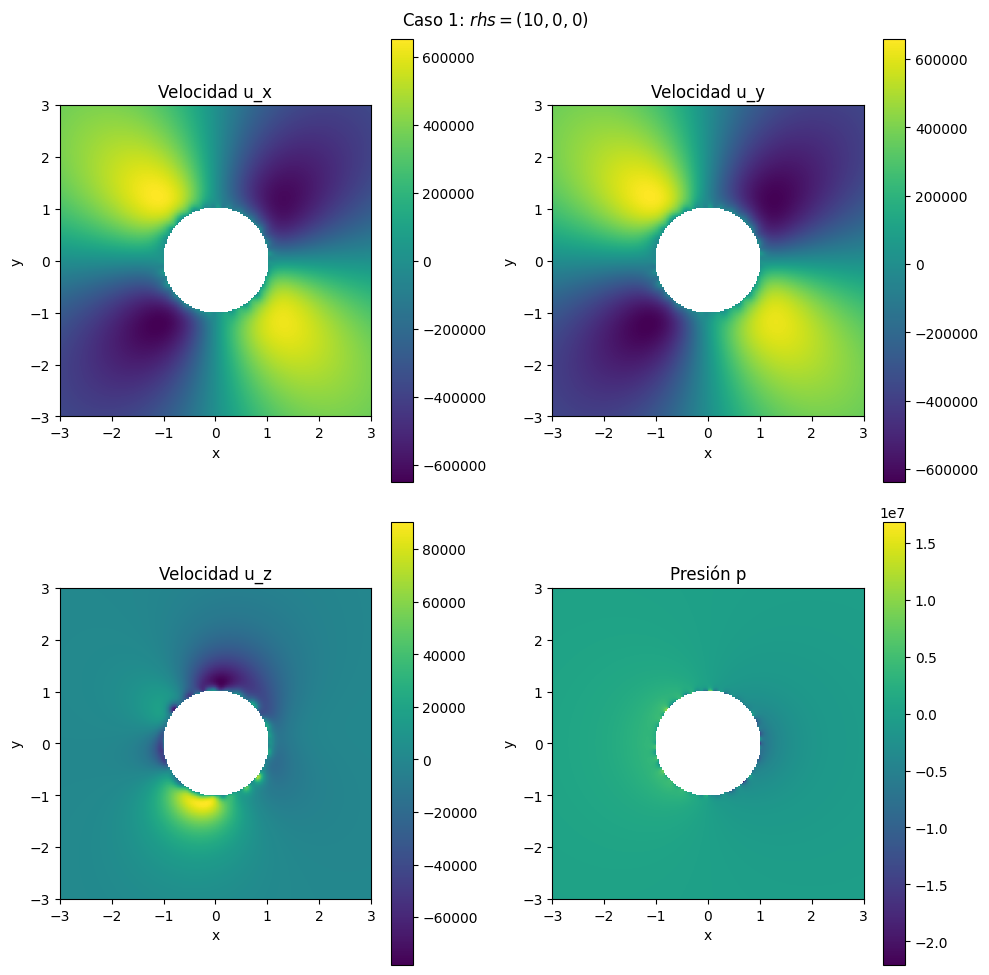

In [40]:
%matplotlib inline

# Filter out solution values that are associated with points outside the unit circle.
u_evaluated1 = u_evaluated1.reshape((n_grid_points,n_grid_points))
u_evaluated2 = u_evaluated2.reshape((n_grid_points,n_grid_points))
u_evaluated3 = u_evaluated3.reshape((n_grid_points,n_grid_points))
p_evaluated  = p_evaluated.reshape((n_grid_points,n_grid_points))
radius = np.sqrt(plot_grid[0]**2 + plot_grid[1]**2)
u_evaluated1[radius<1] = np.nan
u_evaluated2[radius<1] = np.nan
u_evaluated3[radius<1] = np.nan
p_evaluated[radius<1] = np.nan

# Plot the image
import matplotlib.pyplot as plt
f, axs = plt.subplots(2,2,figsize=(10,10))

image = axs[0,0].imshow(u_evaluated1, extent=(-3,3,-3, 3))
plt.colorbar(image, ax=axs[0,0])
axs[0,0].set_title("Velocidad u_x")
axs[0,0].set_xlabel('x')
axs[0,0].set_ylabel('y')

image = axs[0,1].imshow(u_evaluated2, extent=(-3,3,-3, 3))
plt.colorbar(image, ax=axs[0,1])
axs[0,1].set_title("Velocidad u_y")
axs[0,1].set_xlabel('x')
axs[0,1].set_ylabel('y')

image = axs[1,0].imshow(u_evaluated3, extent=(-3,3,-3, 3))
plt.colorbar(image, ax=axs[1,0])
axs[1,0].set_title("Velocidad u_z")
axs[1,0].set_xlabel('x')
axs[1,0].set_ylabel('y')

image = axs[1,1].imshow(p_evaluated, extent=(-3,3,-3, 3))
plt.colorbar(image, ax=axs[1,1])
axs[1,1].set_title("Presión p")
axs[1,1].set_xlabel('x')
axs[1,1].set_ylabel('y')

f.suptitle('Caso 1: $rhs=(10,0,0)$')
f.tight_layout()
plt.show()

#### Caso 2: $rhs=(0,10,0)$

In [51]:
@bempp.api.real_callable
def dirichlet_data_x(x, n, domain_index, result):
    result[0] = 0


@bempp.api.real_callable
def dirichlet_data_y(x, n, domain_index, result):
    result[0] = 10


@bempp.api.real_callable
def dirichlet_data_z(x, n, domain_index, result):
    result[0] = 0


dirichlet_fun_x = bempp.api.GridFunction(p1_space, fun=dirichlet_data_x)
dirichlet_fun_y = bempp.api.GridFunction(p1_space, fun=dirichlet_data_y)
dirichlet_fun_z = bempp.api.GridFunction(p1_space, fun=dirichlet_data_z)
rhs = [dirichlet_fun_x, dirichlet_fun_y, dirichlet_fun_z]

# Resolvemos el sistema:
Tu = bempp.api.linalg.lu(A, rhs)

In [52]:
n_grid_points = 200
plot_grid = np.mgrid[-3 : 3 : n_grid_points * 1j, -3 : 3 : n_grid_points * 1j]
points = np.vstack(
    (plot_grid[0].ravel(), plot_grid[1].ravel(), np.zeros(plot_grid[0].size))
)

In [53]:
# Velocidad:
slp1_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=0
)
slp2_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=1
)
slp3_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=2
)
slp4_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=3
)
slp5_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=4
)
slp6_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=5
)
slp7_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=6
)
slp8_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=7
)
slp9_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=8
)

u_evaluated1 = slp1_pot * Tu[0] + slp2_pot * Tu[1] + slp3_pot * Tu[2]
u_evaluated2 = slp4_pot * Tu[0] + slp5_pot * Tu[1] + slp6_pot * Tu[2]
u_evaluated3 = slp7_pot * Tu[0] + slp8_pot * Tu[1] + slp9_pot * Tu[2]

In [54]:
# Presión:
slp10_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=9
)
slp11_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=10
)
slp12_pot = bempp.api.operators.potential.stokes.single_layer(
    p1_space, points, opt_layer=11
)

p_evaluated = slp10_pot * Tu[0] + slp11_pot * Tu[1] + slp12_pot * Tu[2]

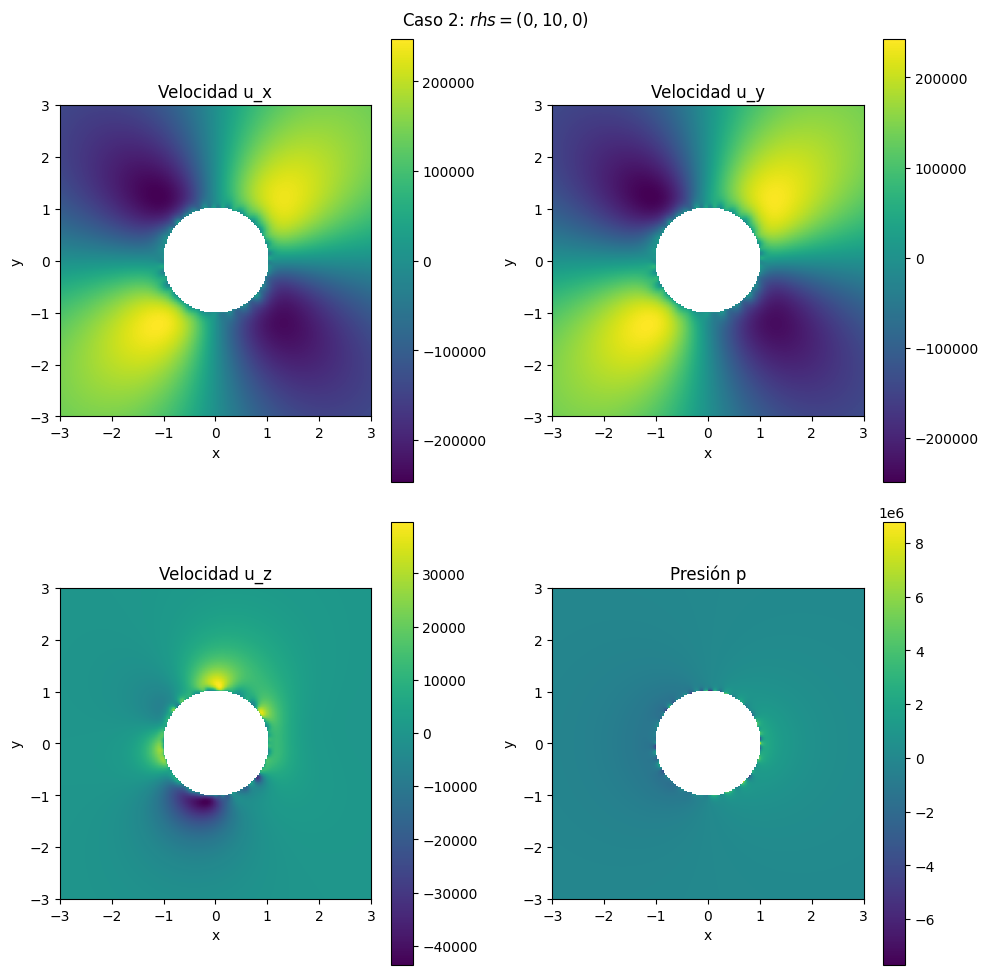

In [55]:
%matplotlib inline

# Filter out solution values that are associated with points outside the unit circle.
u_evaluated1 = u_evaluated1.reshape((n_grid_points,n_grid_points))
u_evaluated2 = u_evaluated2.reshape((n_grid_points,n_grid_points))
u_evaluated3 = u_evaluated3.reshape((n_grid_points,n_grid_points))
p_evaluated  = p_evaluated.reshape((n_grid_points,n_grid_points))
radius = np.sqrt(plot_grid[0]**2 + plot_grid[1]**2)
u_evaluated1[radius<1] = np.nan
u_evaluated2[radius<1] = np.nan
u_evaluated3[radius<1] = np.nan
p_evaluated[radius<1] = np.nan

# Plot the image
import matplotlib.pyplot as plt
f, axs = plt.subplots(2,2,figsize=(10,10))

image = axs[0,0].imshow(u_evaluated1, extent=(-3,3,-3, 3))
plt.colorbar(image, ax=axs[0,0])
axs[0,0].set_title("Velocidad u_x")
axs[0,0].set_xlabel('x')
axs[0,0].set_ylabel('y')

image = axs[0,1].imshow(u_evaluated2, extent=(-3,3,-3, 3))
plt.colorbar(image, ax=axs[0,1])
axs[0,1].set_title("Velocidad u_y")
axs[0,1].set_xlabel('x')
axs[0,1].set_ylabel('y')

image = axs[1,0].imshow(u_evaluated3, extent=(-3,3,-3, 3))
plt.colorbar(image, ax=axs[1,0])
axs[1,0].set_title("Velocidad u_z")
axs[1,0].set_xlabel('x')
axs[1,0].set_ylabel('y')

image = axs[1,1].imshow(p_evaluated, extent=(-3,3,-3, 3))
plt.colorbar(image, ax=axs[1,1])
axs[1,1].set_title("Presión p")
axs[1,1].set_xlabel('x')
axs[1,1].set_ylabel('y')

f.suptitle('Caso 2: $rhs=(0,10,0)$')
f.tight_layout()
plt.show()